In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

import requests as re

sns.set_context('poster')
sns.set_style('whitegrid')

In [4]:
df = pd.read_json('train_data.json')

In [3]:
df.columns

Index(['Balcony', 'Cats Allowed', 'Common Outdoor Space', 'Dining Room',
       'Dishwasher', 'Dogs Allowed', 'Doorman', 'Elevator', 'Exclusive',
       'Fitness Center', 'Garden/Patio', 'Hardwood Floors',
       'High Speed Internet', 'Laundry In Building', 'Laundry in Building',
       'Laundry in Unit', 'Loft', 'New Construction', 'No Fee',
       'Outdoor Space', 'Pre-War', 'Roof Deck', 'Swimming Pool', 'Terrace',
       'Wheelchair Access', 'bathrooms', 'bedrooms', 'building_id', 'created',
       'description', 'display_address', 'features', 'index', 'interest_level',
       'latitude', 'level_0', 'listing_id', 'longitude', 'manager_id',
       'photos', 'price', 'street_address'],
      dtype='object')

@BRADEN @BRIANNA do we need to set index as the row labels on the dataframe?

In [7]:
df.interest_level.value_counts()

low       29147
medium     9491
high       3280
Name: interest_level, dtype: int64

In [5]:
test = pd.read_json('test_data.json')

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7434 entries, 0 to 999
Data columns (total 41 columns):
Balcony                 7434 non-null int64
Cats Allowed            7434 non-null int64
Common Outdoor Space    7434 non-null int64
Dining Room             7434 non-null int64
Dishwasher              7434 non-null int64
Dogs Allowed            7434 non-null int64
Doorman                 7434 non-null int64
Elevator                7434 non-null int64
Exclusive               7434 non-null int64
Fitness Center          7434 non-null int64
Garden/Patio            7434 non-null int64
Hardwood Floors         7434 non-null int64
High Speed Internet     7434 non-null int64
Laundry In Building     7434 non-null int64
Laundry in Building     7434 non-null int64
Laundry in Unit         7434 non-null int64
Loft                    7434 non-null int64
New Construction        7434 non-null int64
No Fee                  7434 non-null int64
Outdoor Space           7434 non-null int64
Pre-War       

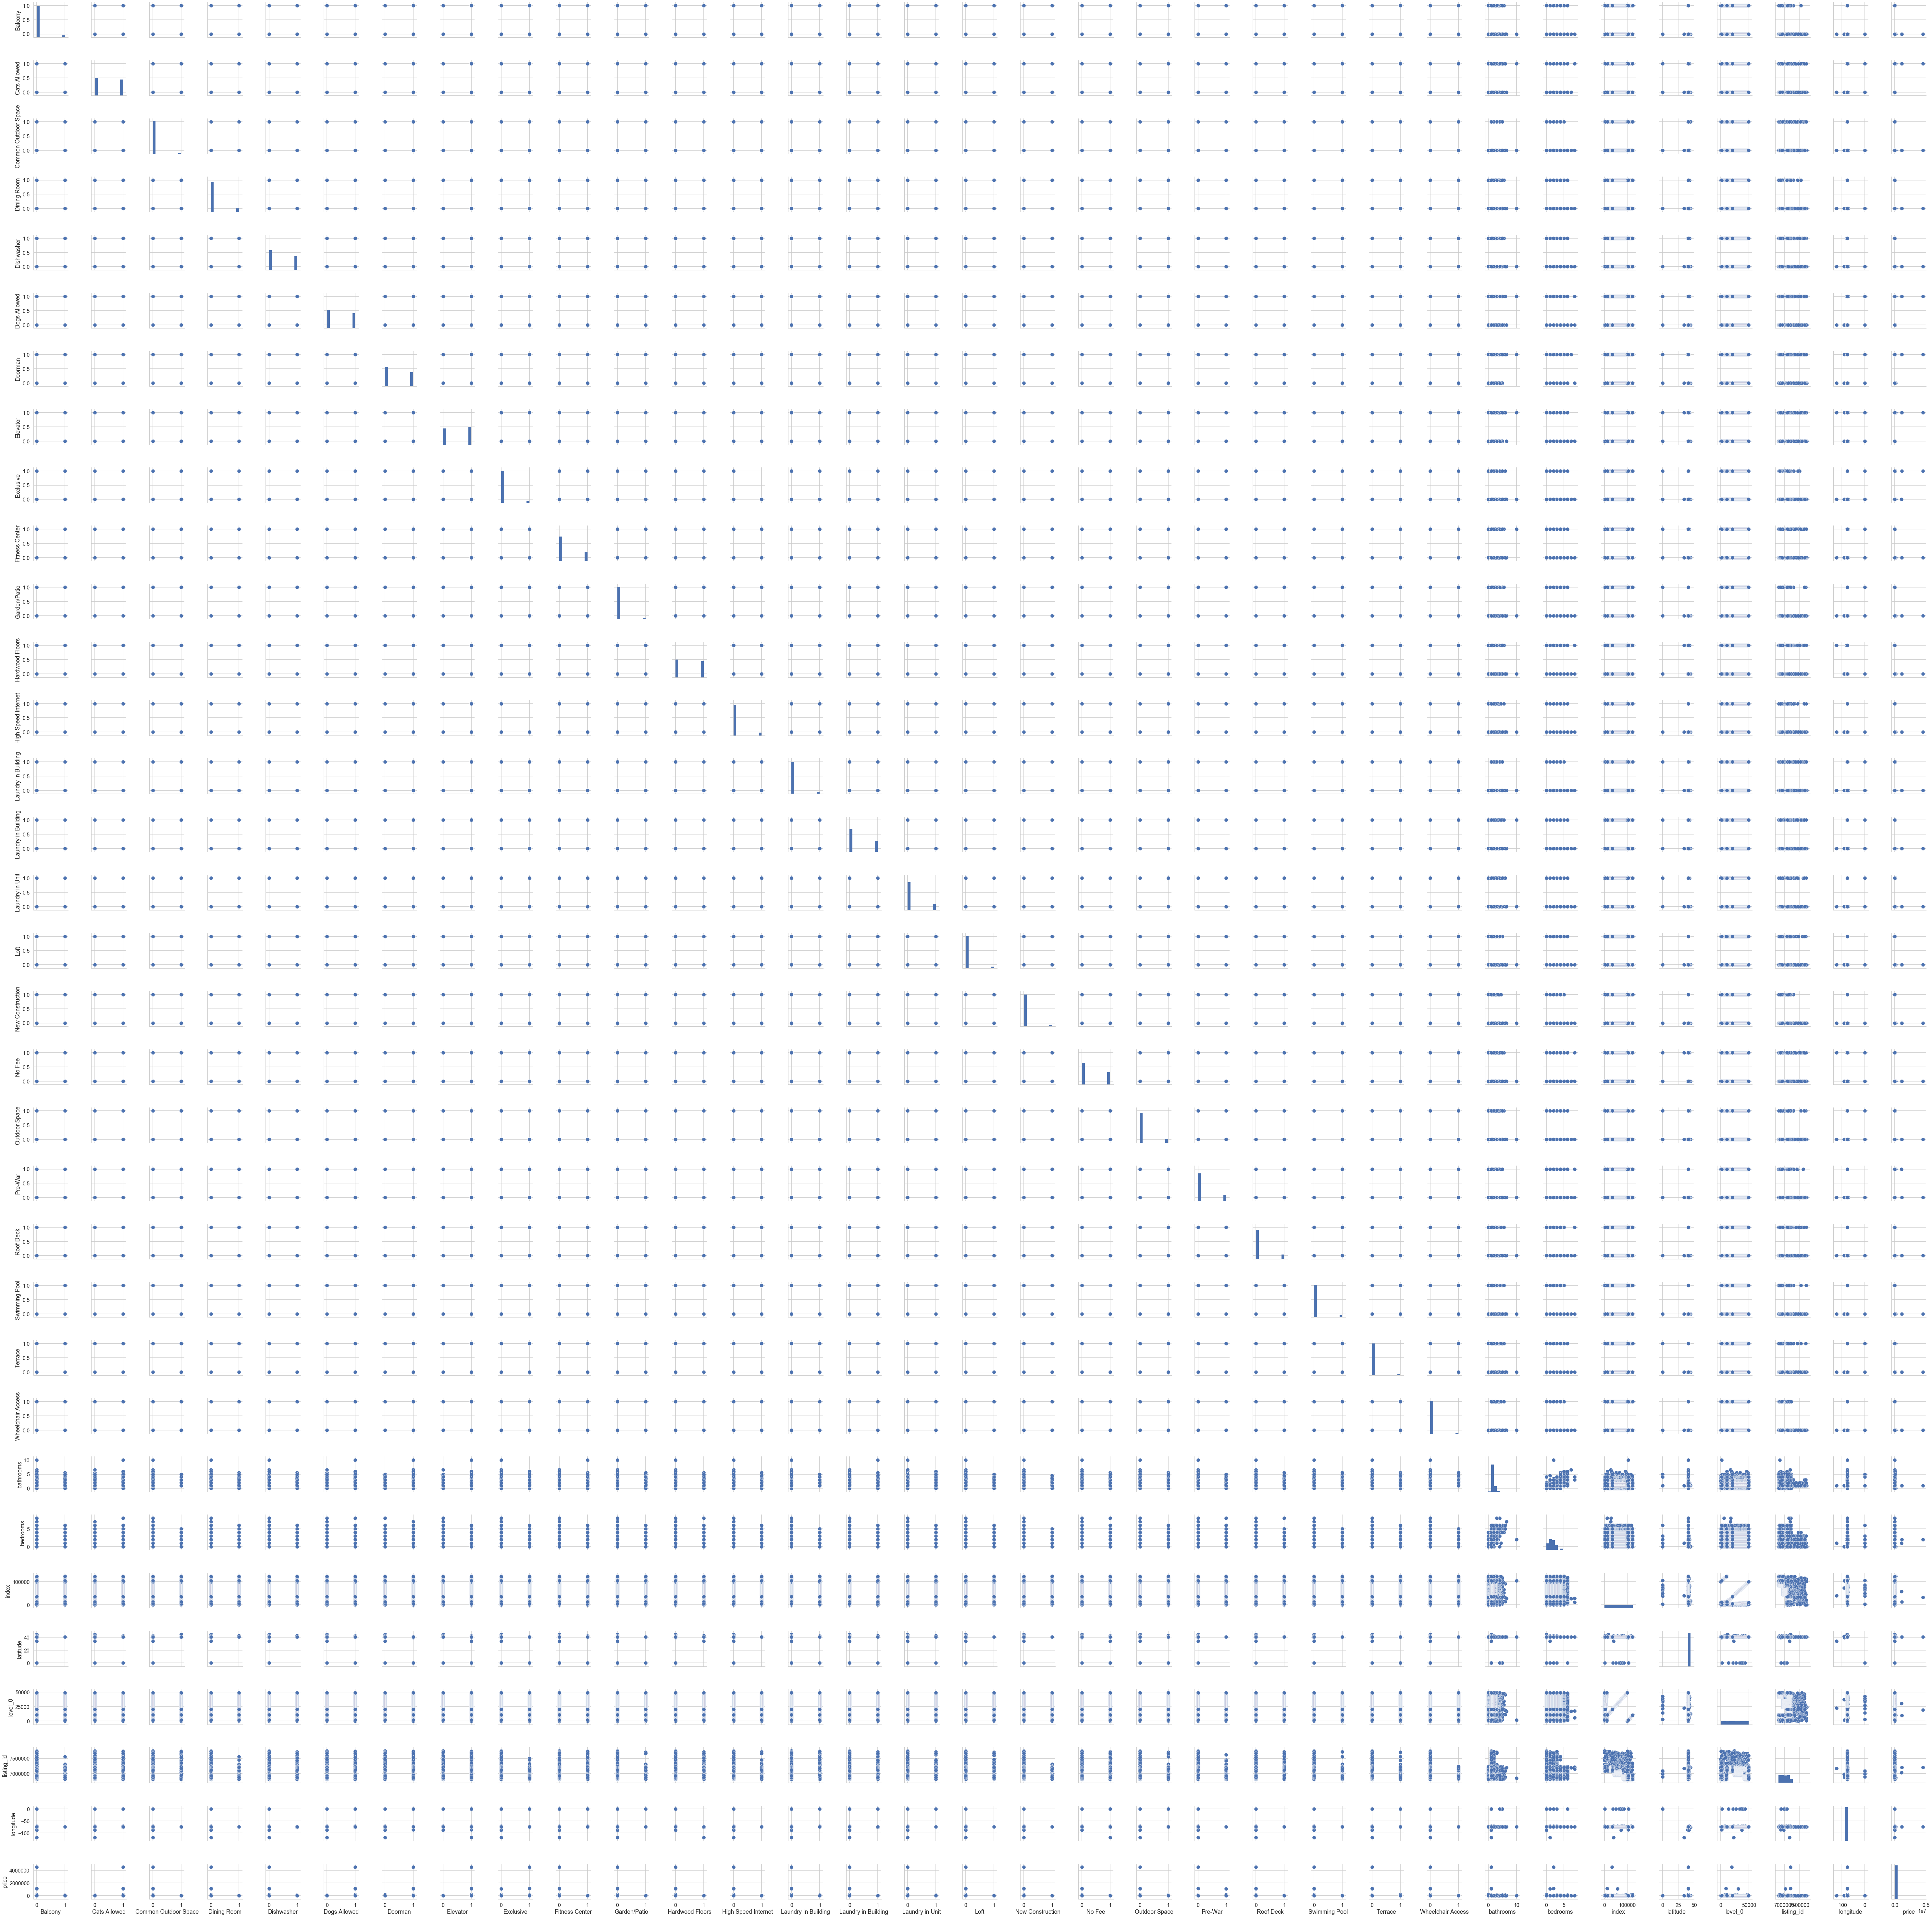

In [4]:
# Pairwise Plot of Data
sns.pairplot(df)

In [5]:
# Correlation Matrix of Data
df.corr()

Balcony  Cats Allowed  Common Outdoor Space  \
Balcony               1.000000      0.017895             -0.028158   
Cats Allowed          0.017895      1.000000              0.106673   
Common Outdoor Space -0.028158      0.106673              1.000000   
Dining Room           0.245208     -0.025945             -0.043717   
Dishwasher            0.231908     -0.046506             -0.085930   
Dogs Allowed          0.022130      0.936880              0.107663   
Doorman               0.162431      0.091194              0.126002   
Elevator              0.169046      0.034568              0.113751   
Exclusive            -0.041507      0.032892              0.033617   
Fitness Center        0.128755      0.128856              0.196436   
Garden/Patio          0.313507      0.009756             -0.026280   
Hardwood Floors       0.181289     -0.178107             -0.120053   
High Speed Internet   0.143051      0.077709             -0.017883   
Laundry In Building  -0.031720      0.110203              0.590175   
Laundry in Building   0.195560     -0.064078             -0.076692   
Laundry in Unit       0.164241     -0.008383             -0.062365   
Loft                  0.042018     -0.038435             -0.029449   
New Construction      0.072239      0.044153             -0.022282   
No Fee                0.128663     -0.023604              0.034830   
Outdoor Space         0.436829      0.015501             -0.047002   
Pre-War              -0.042080      0.046088             -0.066599   
Roof Deck             0.134738      0.027603             -0.019188   
Swimming Pool         0.115287      0.010906             -0.017160   
Terrace               0.464583      0.007191             -0.029045   
Wheelchair Access     0.038638      0.037518             -0.016774   
bathrooms             0.143434      0.017855             -0.003425   
bedrooms              0.103327     -0.008376              0.005396   
index                -0.007539     -0.007526              0.024723   
latitude              0.004592     -0.007268             -0.004602   
level_0               0.003524     -0.002388              0.011135   
listing_id            0.002470      0.002290              0.000063   
longitude            -0.004383      0.005535             -0.005096   
price                 0.011582      0.011299             -0.000422   

                      Dining Room  Dishwasher  Dogs Allowed   Doorman  \
Balcony                  0.245208    0.231908      0.022130  0.162431   
Cats Allowed            -0.025945   -0.046506      0.936880  0.091194   
Common Outdoor Space    -0.043717   -0.085930      0.107663  0.126002   
Dining Room              1.000000    0.355879     -0.020394  0.203796   
Dishwasher               0.355879    1.000000     -0.043973  0.318889   
Dogs Allowed            -0.020394   -0.043973      1.000000  0.096409   
Doorman                  0.203796    0.318889      0.096409  1.000000   
Elevator                 0.201764    0.349221      0.034736  0.614850   
Exclusive               -0.072015   -0.108303      0.034690 -0.079479   
Fitness Center           0.184223    0.278991      0.132625  0.606368   
Garden/Patio             0.232253    0.174863      0.012675  0.075090   
Hardwood Floors          0.319395    0.636708     -0.187557  0.211169   
High Speed Internet      0.184215    0.258676      0.088654  0.313526   
Laundry In Building     -0.054609   -0.102602      0.098199  0.071798   
Laundry in Building      0.280545    0.470396     -0.059357  0.466716   
Laundry in Unit          0.261971    0.446121      0.002363  0.174107   
Loft                     0.058409    0.062450     -0.041242  0.015454   
New Construction         0.116036    0.212234      0.057091  0.222943   
No Fee                   0.231030    0.367216     -0.011869  0.256673   
Outdoor Space            0.320752    0.315348      0.015622  0.180123   
Pre-War                  0.011361    0.009876      0.049772 -0.051992   
Roof Deck                0.189789   

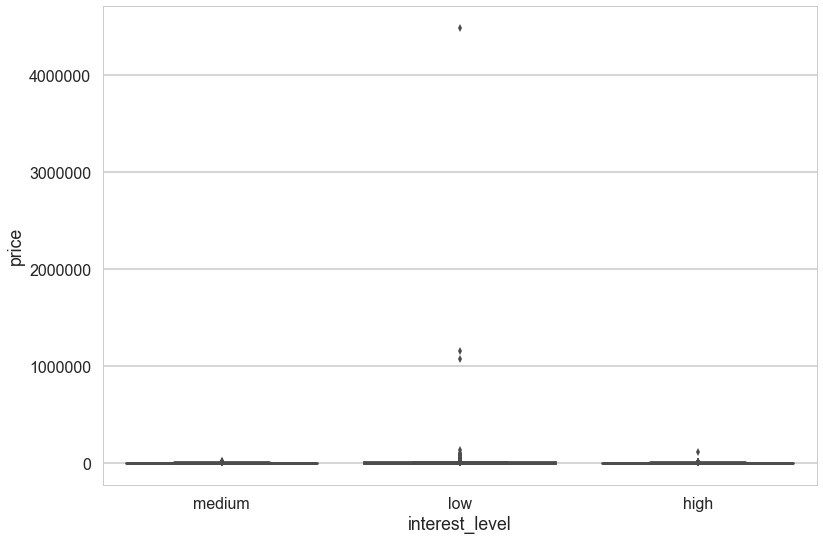

In [9]:
# Side by Side Box Plot of Price vs. High, Medium, and Low Interest
sns.boxplot(x=df['interest_level'], y=df['price'])

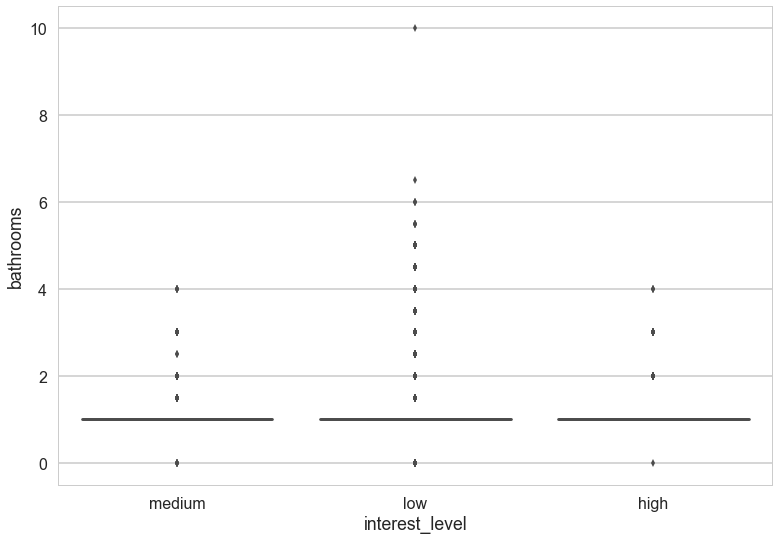

In [10]:
# Side by Side Box Plot of Bathrooms vs. High, Medium, and Low Interest
sns.boxplot(x=df['interest_level'], y=df['bathrooms'])

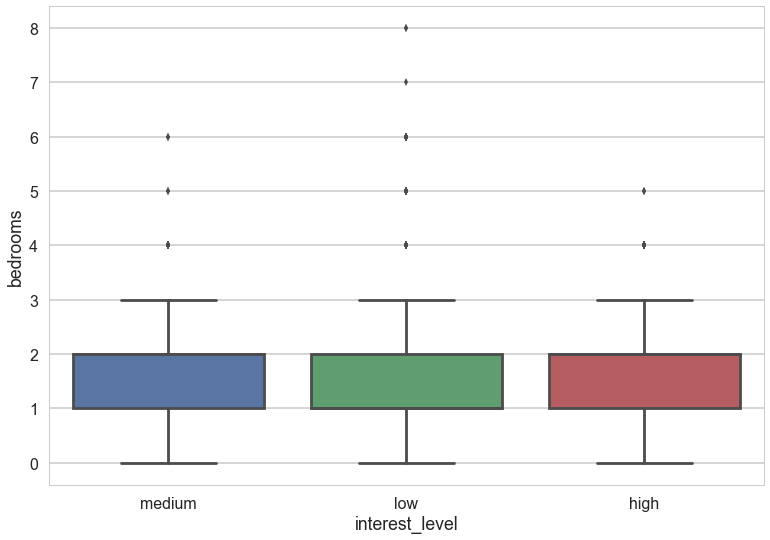

In [11]:
# Side by Side Box Plot of Bedrooms vs. High, Medium, and Low Interest
sns.boxplot(x=df['interest_level'], y=df['bedrooms'])

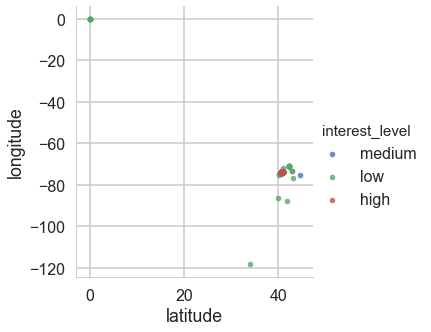

In [14]:
# See if geographical location affects interest level
sns.lmplot(x="latitude", y="longitude", hue="interest_level", data=df, fit_reg=False, legend=True, markers='.')

If we drop these two locational outliers and zoom in on the clustered points, maybe we can find something out about location... @Braden @Brianna what is the best way to remove these points?

In [15]:
# Remove locational outliers
df_location = df.copy()